Text(0, 0.5, 'mpg')

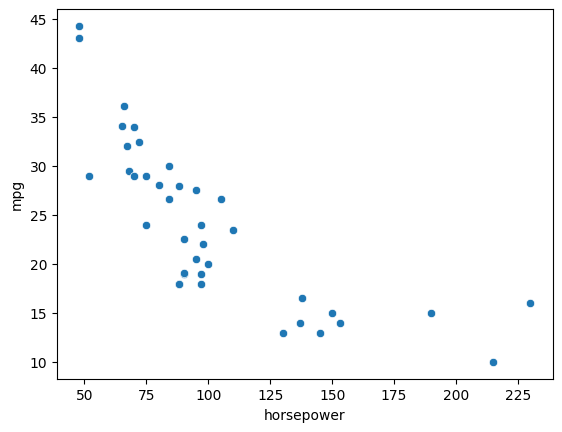

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

df = sns.load_dataset("mpg")
df.dropna(inplace=True)
X = df["horsepower"].values.reshape(-1, 1)
y = df["mpg"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)
sns.scatterplot(x=X_train[:, 0], y=y_train)
plt.xlabel("horsepower")
plt.ylabel("mpg")

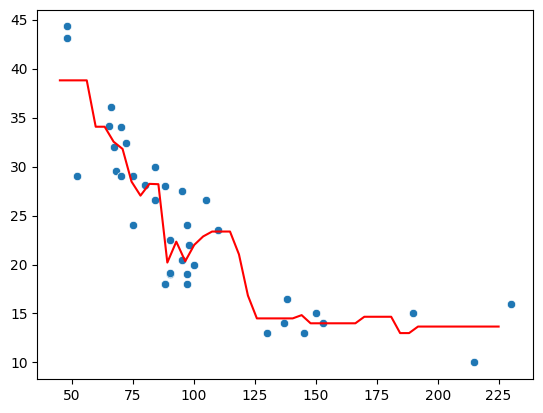

In [12]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

x_axis = np.linspace(45, 225).reshape(-1, 1)
y_pred = model.predict(x_axis)
sns.scatterplot(x=X_train[:, 0], y=y_train)
plt.plot(x_axis, y_pred, "red")

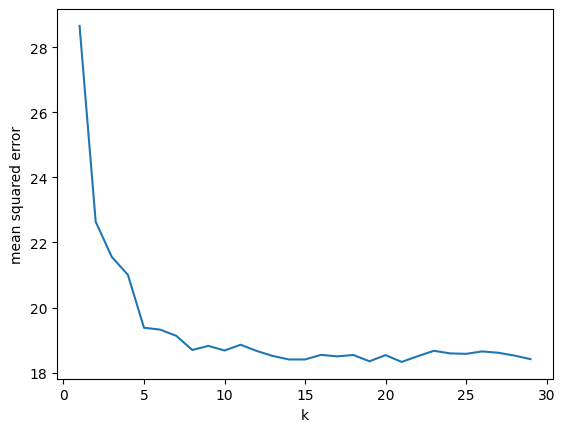

Best k = 21, score=18.327424802442884


In [17]:
from sklearn.model_selection import KFold, cross_val_score

score_list=[]
k_list = np.arange(1,30)
for k in k_list:
    k_fold = KFold(n_splits=5, random_state=0, shuffle=True)
    model = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=k_fold, n_jobs=-1)
    score_list.append(-np.mean(scores))
plt.plot(k_list, score_list)
plt.xlabel("k")
plt.ylabel("mean squared error")
plt.show()
print(f"Best k = {k_list[np.argmin(score_list)]}, score={np.min(score_list)}")